In [1]:
%pylab inline
from app.analysis import Quote
foreign = Quote.screen_funds('Equities', 'Foreign', max_expense=.8) + ['VT', 'ACWI', 'ACWV']
reit = Quote.screen_funds('Alternatives', min_assets=1, max_expense=.6)
commodity = Quote.screen_funds('Commodities', min_assets=.6, max_expense=1)
print(len(foreign), len(reit), len(commodity))
quote = Quote(foreign + reit + commodity, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
87 12 10
from 2019-01-31 to 2019-07-31 - 109


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

85


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
ASHR,122,0.125712,0.731892,0.160919,14.969069,16.661257
EWL,122,0.106864,0.271496,0.364380,13.844332,3.113807
HEDJ,122,0.094299,0.347395,0.248600,11.649263,6.313765
DBEU,122,0.091325,0.263738,0.316179,11.894101,4.396349
HEZU,122,0.089128,0.315464,0.257372,10.973068,5.853812
RSX,122,0.088880,0.363524,0.222665,10.739523,5.962674
EWA,122,0.088781,0.238100,0.339538,11.054332,3.321207
EFG,122,0.082911,0.270851,0.276810,10.240086,4.537548
VIGI,122,0.079497,0.247742,0.288852,9.527708,4.587566


evicted EFAV 0.893 0.198
evicted DGS 0.884 -0.013
evicted VNQI 0.860 0.158
evicted EWC 0.856 0.172
evicted DWX 0.889 0.173
evicted SCZ 0.894 -0.020
evicted EWJ 0.800 0.108
evicted RWX 0.650 0.034
evicted VIGI 0.856 0.156
evicted EWH 0.681 0.094
evicted PSLV 0.779 -0.176
evicted EWT 0.574 -0.033
evicted EWZ 0.412 0.070
evicted INDA 0.420 -0.157
evicted ACWV 0.754 0.182
evicted REM 0.432 -0.026
evicted USO 0.364 0.006
evicted ASHR 0.615 -0.040
evicted RSX 0.510 0.081
evicted EWL 0.721 0.168
evicted XLRE 0.221 -0.007
retry backlogs ['VEU', 'EFA', 'IEV', 'ACWI', 'IXUS', 'PXF', 'RWR', 'ACWX', 'BBJP', 'EWQ', 'SGOL', 'VEA', 'VWO', 'SPEM', 'FNDC', 'VPL', 'HEFA', 'FNDF', 'SCHC', 'VXUS', 'EZU', 'SCHF', 'VNQ', 'SPDW', 'VGK', 'VT', 'CWI', 'EFG', 'IEUR', 'GLD', 'DWM', 'IPAC', 'EFV', 'SCHH', 'INTF', 'HEZU', 'BBEU', 'ICF', 'USRT', 'GSIE', 'IQDF', 'IYR', 'RODM', 'VSS', 'TLTD', 'IEFA', 'IDEV', 'EWU', 'VYMI', 'AIA', 'IDV', 'FEZ', 'SCHE', 'RWO', 'DBEF', 'REET', 'EPP', 'EWG', 'HEDJ', 'GSG', 'SLV'] at 0.90

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.081962,0.182534,-0.343452,-0.042073,0.058241,0.200442,0.627557,0.405547,10.178380,2.388635
EWA,122.0,0.088781,0.238100,-0.352112,-0.085628,0.070655,0.236570,0.762436,0.339538,11.054332,3.321207
DBEU,122.0,0.091325,0.263738,-0.684647,-0.086309,0.084634,0.275289,0.563596,0.316179,11.894101,4.396349
GLD,122.0,0.061391,0.326712,-0.624899,-0.122669,0.060353,0.202501,1.157343,0.163615,6.781569,5.335434


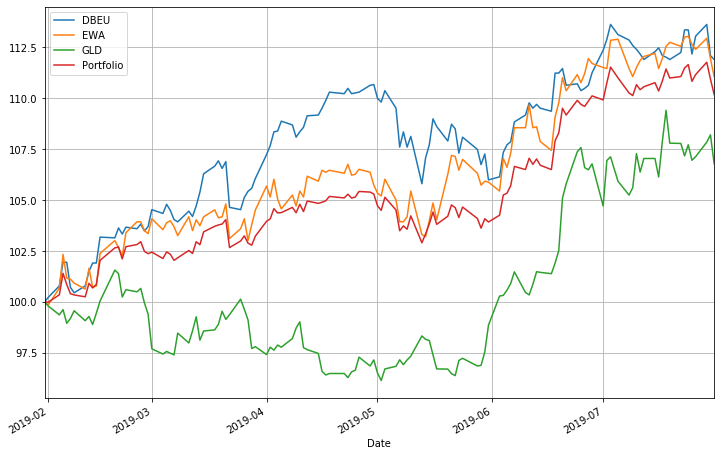

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['DBEU', 'EWA', 'GLD'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['DBEU', 'EWA', 'GLD'])
quote.graph({'DBEU': 0.41, 'EWA': 0.31, 'GLD': 0.28})